In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Multiobjective Optimization Concepts and Performance Metrics

## Definition 28: Incomparable Sets

An approximation set $ A $ is said to be incomparable to another approximation set $ B $, denoted by $ A \bowtie B $, if neither $ A $ weakly dominates $ B $ nor $ B $ weakly dominates $ A $:
$$
A \bowtie B \iff A \npreceq B \land B \npreceq A
$$

## Probability Representations of Dominance Relations

For dominance and non-dominance between sets $ A $ and $ B $, we can represent probabilities as follows:

- **$ A $ dominates $ B $**: 
  $$
  P(A \succ B) = 1, \quad P(A \prec B) = 0, \quad P(A \equiv B) = 0
  $$
- **$ A $ is dominated by $ B $**:
  $$
  P(A \prec B) = 1, \quad P(A \succ B) = 0, \quad P(A \equiv B) = 0
  $$
- **$ A $ and $ B $ are nondominated relative to each other**:
  $$
  P(A \succ B) = 0, \quad P(A \prec B) = 0, \quad P(A \equiv B) = 1
  $$

## Fitness in Multiobjective Optimization

In multiobjective optimization, the fitness of an individual refers to its direct competition capability with other individuals from a different population. Fitness evaluation plays a crucial role in assessing individuals throughout the evolutionary process.

When comparing two fitness values $ A $ and $ B $ across multiple objectives in a noiseless setting, there are three possible outcomes from the comparison.

In **noisy multiobjective optimization**, aside from convergence, diversity, and spread of the Pareto front, additional indicators include **hypervolume** and **imprecision**.

## Indicators for Pareto-optimal Sets

To determine whether a nondominated set is Pareto-optimal, Zitzler et al. [171] suggest three goals:
1. **Minimize the distance** of the obtained nondominated front to the Pareto-optimal front.
2. **Ensure a good distribution** of the solutions found, ideally uniform in the objective space.
3. **Maximize the extent** of the obtained nondominated front, providing a wide range of values across each objective.

These **performance metrics** or **indicators** are essential in evaluating noisy multiobjective optimization algorithms.

## Definition 29: Hypervolume for a Set

For an approximate Pareto-optimal solution set $ X $, the **hypervolume** is defined as:
$$
H(X) = \bigcup_{x \in X} \bigcap_{y \in R^n} \mathbf{1}(y \leq x) \mathbf{1}(y \geq x_{\text{ref}})
$$
where $ x_{\text{ref}} $ is a reference point, and $ \mathbf{1}(\cdot) $ is the indicator function. Here, $ H(X) $ represents the **hypervolume** measure, providing the volume under the approximation front in the objective space.

## Definition : Imprecision for a Set

The **imprecision** of the front for an approximate Pareto-optimal solution set $ X $ is defined as:
$$
I(X) = \sum_{x \in X} \sum_{i=1}^{k} \left( f_i(x, c_i) - f_i(x, \bar{c}_i) \right)
$$
where $ f_i(x, c_i) = [f_i(x, c_i), f_i(x, \bar{c}_i)] $ represents the $ i $-th objective function evaluated over an interval $ c_i = [c_i, \bar{c}_i] $. A smaller imprecision value indicates lower uncertainty of the front.

## Section 4: Performance Metrics for Approximation Sets

Performance metrics are vital for evaluating noisy multiobjective optimization. The hypervolume and imprecision metrics are particularly important for assessing the quality of approximation sets in these contexts.


In [1]:
# Define a reference point for hypervolume calculation
REFERENCE_POINT = [10, 10]  # Adjust based on the problem domain

# Define Pareto set with each solution as a list of objective values
pareto_set = [
    [3, 7], [5, 6], [7, 4], [6, 5], [8, 3]
]  # Example set of solutions

# Function to calculate the hypervolume
def calculate_hypervolume(pareto_set, ref_point):
    hypervolume = 0
    for solution in pareto_set:
        # Calculate volume of the rectangular space between the solution and the reference point
        volume = 1
        for dim in range(len(ref_point)):
            volume *= max(0, ref_point[dim] - solution[dim])
        hypervolume += volume
    return hypervolume

# Function to calculate the imprecision
def calculate_imprecision(pareto_set, objective_intervals):
    # objective_intervals is a list of tuples [(c1, c̄1), (c2, c̄2), ...]
    # where each tuple represents the interval for each objective
    imprecision = 0
    for solution in pareto_set:
        for i in range(len(objective_intervals)):
            # Imprecision is the difference between upper and lower bounds for each objective
            c_i, c_bar_i = objective_intervals[i]
            imprecision += abs(c_bar_i - c_i)
    return imprecision

# Example usage:
objective_intervals = [(2, 3), (4, 6)]  # Define intervals for each objective in the Pareto set

# Calculate hypervolume and imprecision for the Pareto set
hypervolume = calculate_hypervolume(pareto_set, REFERENCE_POINT)
imprecision = calculate_imprecision(pareto_set, objective_intervals)

print("Hypervolume of the Pareto front:", hypervolume)
print("Imprecision of the Pareto front:", imprecision)


Hypervolume of the Pareto front: 93
Imprecision of the Pareto front: 15


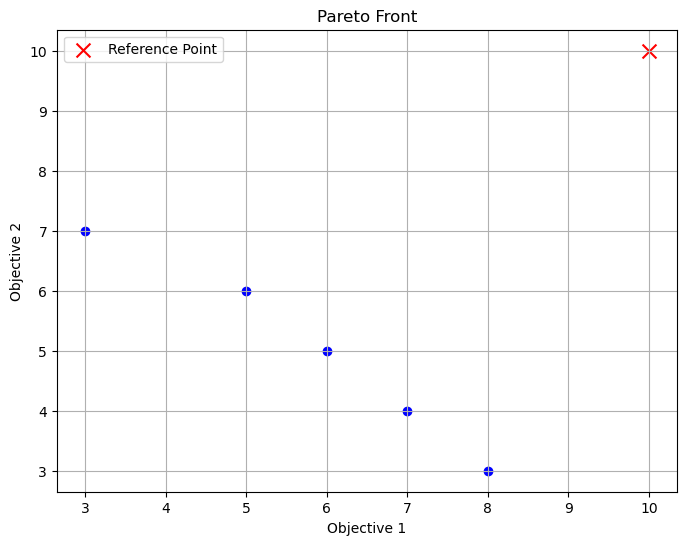

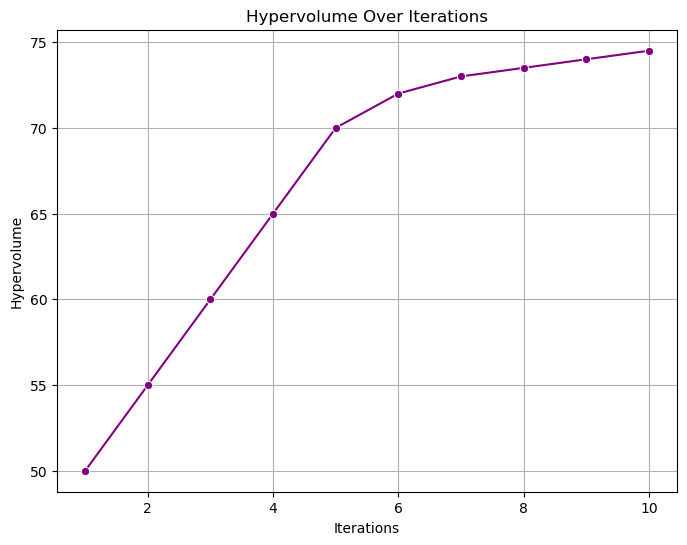

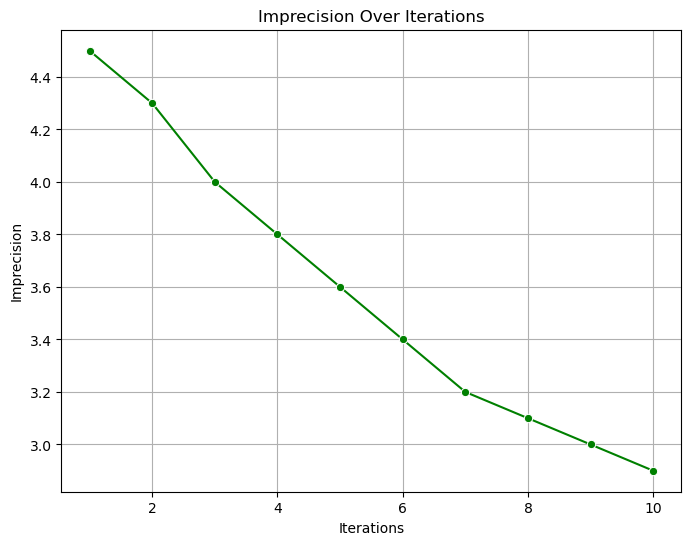

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Pareto set and reference point
pareto_set = [[3, 7], [5, 6], [7, 4], [6, 5], [8, 3]]
REFERENCE_POINT = [10, 10]

# Sample hypervolume and imprecision values across iterations
iterations = list(range(1, 11))
hypervolume_values = [50, 55, 60, 65, 70, 72, 73, 73.5, 74, 74.5]  # Example data
imprecision_values = [4.5, 4.3, 4.0, 3.8, 3.6, 3.4, 3.2, 3.1, 3.0, 2.9]  # Example data

# --- Plot 1: Pareto Front Plot ---
plt.figure(figsize=(8, 6))
for point in pareto_set:
    plt.scatter(point[0], point[1], color='blue')
plt.scatter(REFERENCE_POINT[0], REFERENCE_POINT[1], color='red', marker='x', s=100, label='Reference Point')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.legend()
plt.grid()
plt.show()

# --- Plot 2: Hypervolume over Iterations ---
plt.figure(figsize=(8, 6))
sns.lineplot(x=iterations, y=hypervolume_values, marker='o', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Hypervolume')
plt.title('Hypervolume Over Iterations')
plt.grid()
plt.show()

# --- Plot 3: Imprecision Over Iterations ---
plt.figure(figsize=(8, 6))
sns.lineplot(x=iterations, y=imprecision_values, marker='o', color='green')
plt.xlabel('Iterations')
plt.ylabel('Imprecision')
plt.title('Imprecision Over Iterations')
plt.grid()
plt.show()


# Performance Metrics for Approximation Sets in Noisy Multiobjective Optimization

In noisy multiobjective optimization, performance metrics or indicators play an essential role in evaluating optimization results. Noise can disrupt objective values, with each noisy objective value given by:
$$
\tilde{f}_i(x) = f_i(x) + N(0, \sigma^2)
$$
where $ N(0, \sigma^2) $ denotes a normal distribution with zero mean and variance $ \sigma^2 $, representing the level of noise. Here, $ f_i(x) $ is the original objective function, and $ \tilde{f}_i(x) $ is the noisy objective function. The variance $ \sigma^2 $ is often expressed as a percentage of $ f_i^{\text{max}} $, the maximum of the $ i $-th objective on the true Pareto front.

The performance metrics relevant to optimization goals—**proximity**, **diversity**, and **distribution**—are as follows:

## 1. Proximity Indicator: Generational Distance (GD)

The **Generational Distance (GD)** metric indicates the gap between the evolved Pareto front $ PF_{\text{known}} $ and the true Pareto front $ PF_{\text{true}} $:
$$
GD = \left( \frac{1}{n_{PF}} \sum_{i=1}^{n_{PF}} d_i^2 \right)^{\frac{1}{2}}
$$
where:
- $ n_{PF} $ is the number of members in $ PF_{\text{known}} $.
- $ d_i $ is the Euclidean distance between the $ i $-th member of $ PF_{\text{known}} $ and its nearest member in $ PF_{\text{true}} $.

A lower GD value is desirable, indicating that the evolved Pareto front is close to the true Pareto front. However, GD alone does not provide information about the diversity of the solutions.

## 2. Diversity Indicator: Modified Maximum Spread (MS)

To evaluate **diversity**, we use a modified maximum spread metric:
$$
MS = \frac{1}{m} \sum_{i=1}^{m} \frac{\left( \max \{f_i^{\text{max}}, F_i^{\text{max}}\} - \min \{f_i^{\text{min}}, F_i^{\text{min}}\} \right)}{F_i^{\text{max}} - F_i^{\text{min}}}
$$
where:
- $ m $ is the number of objectives.
- $ f_i^{\text{max}} $ and $ f_i^{\text{min}} $ are the maximum and minimum of the $ i $-th objective in $ PF_{\text{known}} $.
- $ F_i^{\text{max}} $ and $ F_i^{\text{min}} $ are the maximum and minimum of the $ i $-th objective in $ PF_{\text{true}} $.

This metric accounts for the spread of solutions across objectives, showing how well they approximate the true front's diversity.

## 3. Distribution Indicator: Modified Spacing (S)

To assess **distribution**, the modified spacing metric $ S $ is used to measure how evenly distributed the solutions are along the Pareto front:
$$
S = \left( \frac{1}{n_{PF}} \sum_{i=1}^{n_{PF}} (d_i - \bar{d})^2 \right)^{\frac{1}{2}}
$$
where:
- $ d_i $ is the Euclidean distance between the $ i $-th member of $ PF_{\text{known}} $ and its nearest neighbor.
- $ \bar{d} = \frac{1}{n_{PF}} \sum_{i=1}^{n_{PF}} d_i $ is the average Euclidean distance for all members in $ PF_{\text{known}} $.

The metric $ S $ reflects how uniformly solutions are spread, with a lower value indicating a more even distribution along the front.


Generational Distance (GD): 1.118033988749895
Modified Maximum Spread (MS): 1.0
Modified Spacing (S): 0.5969599399589643


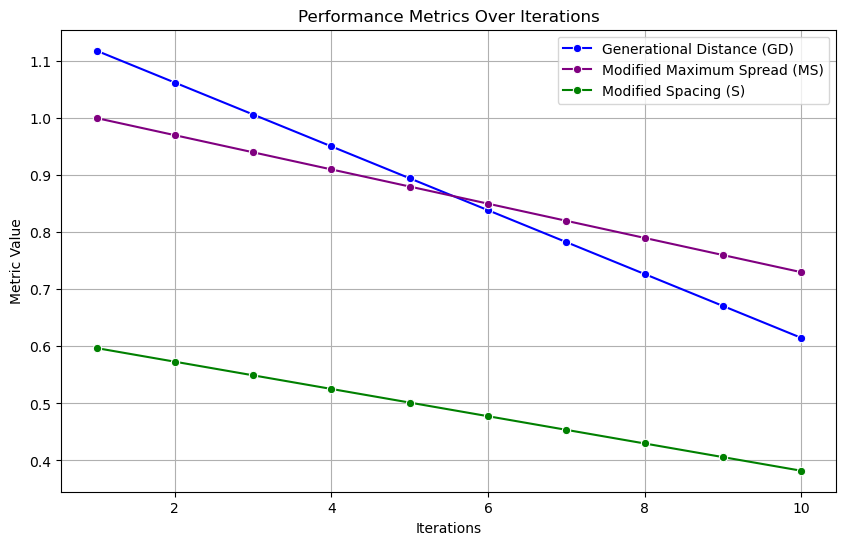

In [3]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for PF_known and PF_true
# These are 2D points representing solutions in the objective space
PF_known = [[2, 3], [4, 5], [3, 6], [5, 7]]
PF_true = [[1, 2], [2, 4], [4, 6], [6, 8]]

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

# 1. Generational Distance (GD)
def generational_distance(PF_known, PF_true):
    n_PF = len(PF_known)
    gd_sum = 0
    for solution in PF_known:
        # Find the closest solution in PF_true to each solution in PF_known
        min_dist = min(euclidean_distance(solution, true_sol) for true_sol in PF_true)
        gd_sum += min_dist ** 2
    GD = math.sqrt(gd_sum / n_PF)
    return GD

# 2. Modified Maximum Spread (MS)
def modified_maximum_spread(PF_known, PF_true):
    m = len(PF_known[0])  # Number of objectives
    ms_sum = 0
    for i in range(m):
        f_i_max_known = max(sol[i] for sol in PF_known)
        f_i_min_known = min(sol[i] for sol in PF_known)
        f_i_max_true = max(sol[i] for sol in PF_true)
        f_i_min_true = min(sol[i] for sol in PF_true)
        ms_sum += (max(f_i_max_known, f_i_max_true) - min(f_i_min_known, f_i_min_true)) / (f_i_max_true - f_i_min_true)
    MS = ms_sum / m
    return MS

# 3. Modified Spacing (S)
def modified_spacing(PF_known, PF_true):
    n_PF = len(PF_known)
    distances = []
    for solution in PF_known:
        # Find the closest distance to other solutions in PF_known
        min_dist = min(euclidean_distance(solution, other_sol) for other_sol in PF_known if other_sol != solution)
        distances.append(min_dist)
    d_bar = sum(distances) / n_PF
    spacing_sum = sum((dist - d_bar) ** 2 for dist in distances)
    S = math.sqrt(spacing_sum / n_PF)
    return S

# Calculate the metrics
GD_value = generational_distance(PF_known, PF_true)
MS_value = modified_maximum_spread(PF_known, PF_true)
S_value = modified_spacing(PF_known, PF_true)

print("Generational Distance (GD):", GD_value)
print("Modified Maximum Spread (MS):", MS_value)
print("Modified Spacing (S):", S_value)

# Sample data for plotting over iterations (for demonstration purposes)
iterations = list(range(1, 11))
gd_values = [GD_value * (1 - 0.05 * i) for i in range(10)]  # Simulated improvement in GD
ms_values = [MS_value * (1 - 0.03 * i) for i in range(10)]  # Simulated improvement in MS
s_values = [S_value * (1 - 0.04 * i) for i in range(10)]    # Simulated improvement in S

# --- Plotting Performance Metrics Over Iterations ---
plt.figure(figsize=(10, 6))
sns.lineplot(x=iterations, y=gd_values, marker="o", color="blue", label="Generational Distance (GD)")
sns.lineplot(x=iterations, y=ms_values, marker="o", color="purple", label="Modified Maximum Spread (MS)")
sns.lineplot(x=iterations, y=s_values, marker="o", color="green", label="Modified Spacing (S)")
plt.xlabel("Iterations")
plt.ylabel("Metric Value")
plt.title("Performance Metrics Over Iterations")
plt.legend()
plt.grid()
plt.show()


## Multiobjective Simulated Annealing

The **Metropolis algorithm** was proposed by Metropolis et al. in 1953, providing an efficient simulation of a collection of atoms in equilibrium at a given temperature. The algorithm was later generalized by Hastings in 1970 to the **Metropolis-Hastings algorithm** and is widely used for solving **multiobjective combinatorial optimization (MOCO)** problems.

### Principle of Simulated Annealing

The concept of simulated annealing is inspired by thermodynamics and metallurgy, where molten materials, if cooled slowly, tend to form a structure of minimal energy.

In simulated annealing:
- At high temperatures, almost any move is accepted, allowing broad exploration of the solution space.
- As temperature decreases, acceptance of solutions becomes more selective, guiding towards optimization.

The temperature is gradually lowered, mimicking the annealing process, such that only solutions that improve the optimization objective are accepted towards the end.

### Categories of Optimization Methods for MOCO

1. **Exact Procedures**
2. **Specialized Heuristic Procedures**
3. **Metaheuristic Procedures**

Metaheuristics provide a flexible framework with two main categories:
- **Single-solution metaheuristics**: Focuses on a single solution, e.g., Simulated Annealing (SA) and Tabu Search (TS).
- **Population metaheuristics**: Evolves a population of solutions, e.g., Genetic Algorithms (GA).

## Simulated Annealing Process

Simulated annealing uses **energy minimization** as its objective. The **energy function** $ E(x) $ at a state $ x $ is minimized by lowering the **temperature** $ T $ according to an **annealing schedule**.

The acceptance probability of a new solution $ x' $ is given by:

$$
p = \min \left(1, \exp \left( -\frac{\delta E(x', x_i)}{T} \right) \right) \tag{9.5.1}
$$

where:
- $ \delta E(x', x_i) = E(x') - E(x_i) $ is the difference in energy (or cost criterion) between the current state $ x_i $ and the new state $ x' $.
- $ T $ is the annealing temperature.

### Acceptance Criteria for Moves

1. **Improving Move**: If $ \delta E(x', x_i) < 0 $, the move is accepted with probability $ p = 1 $.
2. **Worsening Move**: If $ \delta E(x', x_i) > 0 $, the acceptance probability is reduced:

   $$
   p = \exp \left( -\frac{\delta E(x', x_i)}{T} \right)
   $$

3. **Neutral Move**: If $ \delta E(x', x_i) = 0 $, the move may either be accepted or rejected based on predefined schemes.

### Boltzmann Probability

The probability of a solution $ x $ in terms of **Boltzmann’s constant** is given by:

$$
P(E(x)) = \exp \left( -\frac{E(x)}{k_B T} \right)
$$

where:
- $ E(x) $ is the energy of the solution,
- $ k_B $ is the Boltzmann constant.

As $ T \rightarrow 0 $, any sample from $ P(E(x)) $ is likely to be at the minimum of $ E $.

## Key Components for Simulated Annealing Implementation

1. **Decision Rule**: When moving from $ x_i $ to $ x' $, define the cost criterion as:

   $$
   \delta E(x', x_i) = E(x') - E(x_i) \tag{9.5.2}
   $$

2. **Neighborhood $ V(x) $**: Define a feasible set of solutions close to $ x $, forming the **neighborhood** in the search space.

3. **Typical Parameters**:
   - **Initial Temperature** $ T_0 $
   - **Cooling Rate** $ \alpha $
   - **Stopping Condition**

The **annealing schedule** determines the sequence of temperatures and the number of solution rearrangements needed to reach equilibrium at each temperature level.

## Single-Objective Simulated Annealing

Simulated annealing is a probabilistic optimization algorithm based on principles from thermodynamics and metallurgy. It involves starting at a high "temperature," where almost any move is accepted, allowing broad exploration of the solution space. As temperature decreases, moves are accepted more selectively, guiding the system toward an optimal solution.

## Key Parameters

1. **Initial Temperature** $ T_0 $ or initial acceptance probability $ p_0 $.
2. **Cooling Factor** $ \alpha $ where $ \alpha < 1 $ and temperature length step $ N_{\text{step}} $ for cooling.
3. **Stopping Rules**:
   - Final temperature $ T_{\text{stop}} $
   - Maximum number of iterations without improvement $ N_{\text{stop}} $

## Algorithm 4: Single-Objective Simulated Annealing

Given parameters $ T_0 $, $ \alpha $, $ N_{\text{step}} $, $ T_{\text{stop}} $, and $ N_{\text{stop}} $:

1. **Input**: Initialize parameters $ T_0 $, $ \alpha $, $ N_{\text{step}} $, $ T_{\text{stop}} $, and $ N_{\text{stop}} $.
2. **Initialization**:
   - Draw a random initial solution $ x_0 $.
   - Evaluate $ z(x_0) = f(x_0) $.
   - Initialize $ X = \{ x_0 \} $ and counters $ N_{\text{count}} = 0 $ and $ n = 0 $.

3. **While Loop** (repeated for $ n = 1, \ldots, N_{\text{stop}} $):
   - Draw a random solution $ y $ from the neighborhood $ V(x_n) $ of $ x_n $.
   - Evaluate $ z(x_n) = f(x_n) $.
   - Compute $ \delta z = z(x') - z(x_n) $.
   
   $$ p = \exp \left( -\frac{\delta z}{T_n} \right) $$
   
   - **Acceptance Condition**:
     - If $ \delta z \leq 0 $, accept the new solution $ x_{n+1} \leftarrow x' $.
     - If $ \delta z > 0 $, accept the new solution with probability $ p $:
       
       $$ x_{n+1} \leftarrow 
       \begin{cases} 
           x' & \text{with probability } p \\
           x_n & \text{with probability } 1 - p 
       \end{cases} $$
   
   - Increment $ n \leftarrow n + 1 $.

4. **Temperature Update**:
   - Update the temperature $ T_n $ as:
   
     $$ T_n = 
     \begin{cases} 
         \alpha T_{n-1} & \text{if } n \mod N_{\text{stop}} = 0 \\
         T_{n-1} & \text{otherwise}
     \end{cases} $$
   
5. **Termination Condition**:
   - If $ n = N_{\text{stop}} $ or $ T < T_{\text{stop}} $, exit.
   - Otherwise, go to step 4.

6. **Output**: Return the optimal solution $ x_n $.

## Key Features of Simulated Annealing

1. **Escaping Local Optima**: Unlike standard iterative improvement, simulated annealing allows transitions out of a local optimum at nonzero temperatures, reducing the chance of getting stuck in suboptimal regions.
2. **Adaptive Divide-and-Conquer**: At higher temperatures, the algorithm explores broadly to capture the main structure of the solution space. As the temperature lowers, it hones in on finer details, ultimately finding an optimal solution as temperature approaches zero.


In [4]:
import random
import math

# Define the cost function (objective function) for minimization.
def cost_function(x):
    return x**2 + 4*math.sin(2*x)  # example function with a global minimum

# Simulated Annealing algorithm
def simulated_annealing(initial_temp, alpha, temp_step, final_temp, max_iterations):
    # Initialization
    current_solution = random.uniform(-10, 10)  # randomly initialize a solution in some range
    best_solution = current_solution
    current_cost = cost_function(current_solution)
    best_cost = current_cost
    temperature = initial_temp
    iteration = 0

    # Main loop for the simulated annealing process
    while temperature > final_temp and iteration < max_iterations:
        # Generate a new solution in the neighborhood of the current solution
        new_solution = current_solution + random.uniform(-1, 1)
        new_cost = cost_function(new_solution)
        delta_cost = new_cost - current_cost

        # Decide whether to accept the new solution
        if delta_cost < 0 or random.random() < math.exp(-delta_cost / temperature):
            current_solution = new_solution
            current_cost = new_cost

            # Update the best solution found so far
            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost

        # Update temperature according to cooling schedule
        if iteration % temp_step == 0:
            temperature *= alpha

        iteration += 1

    # Output the best solution found
    return best_solution, best_cost

# Parameters for the simulated annealing process
initial_temp = 1000       # Initial temperature
alpha = 0.9               # Cooling factor
temp_step = 10            # Temperature length step for updates
final_temp = 1e-5         # Final temperature to stop the process
max_iterations = 10000    # Maximum number of iterations

# Run the simulated annealing algorithm
best_solution, best_cost = simulated_annealing(initial_temp, alpha, temp_step, final_temp, max_iterations)
print("Optimal solution:", best_solution)
print("Cost at optimal solution:", best_cost)


Optimal solution: -0.6972652099188332
Cost at optimal solution: -3.4518426079929267


Optimal solution: -0.7523558464136308
Cost at optimal solution: -3.4252295009197726


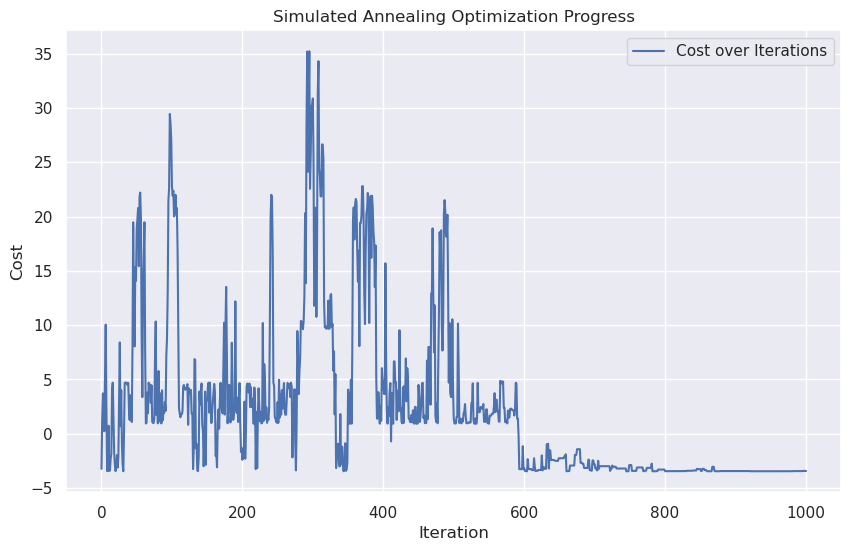

In [5]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cost function (objective function) for minimization.
def cost_function(x):
    return x**2 + 4 * math.sin(2 * x)  # Example function with a global minimum

# Simulated Annealing algorithm
def simulated_annealing(initial_temp, alpha, temp_step, final_temp, max_iterations):
    # Initialization
    current_solution = random.uniform(-10, 10)  # randomly initialize a solution in some range
    current_cost = cost_function(current_solution)
    temperature = initial_temp
    iteration = 0

    # Store costs to plot later
    costs = [current_cost]

    # Main loop for the simulated annealing process
    while temperature > final_temp and iteration < max_iterations:
        # Generate a new solution in the neighborhood of the current solution
        new_solution = current_solution + random.uniform(-1, 1)
        new_cost = cost_function(new_solution)
        delta_cost = new_cost - current_cost

        # Decide whether to accept the new solution
        if delta_cost < 0 or random.random() < math.exp(-delta_cost / temperature):
            current_solution = new_solution
            current_cost = new_cost

        # Update temperature according to cooling schedule
        if iteration % temp_step == 0:
            temperature *= alpha

        # Record current cost for plotting
        costs.append(current_cost)
        iteration += 1

    return current_solution, current_cost, costs

# Parameters for the simulated annealing process
initial_temp = 1000       # Initial temperature
alpha = 0.9               # Cooling factor
temp_step = 10            # Temperature length step for updates
final_temp = 1e-5         # Final temperature to stop the process
max_iterations = 1000     # Maximum number of iterations

# Run the simulated annealing algorithm
best_solution, best_cost, costs = simulated_annealing(initial_temp, alpha, temp_step, final_temp, max_iterations)
print("Optimal solution:", best_solution)
print("Cost at optimal solution:", best_cost)

# Plotting the cost over iterations
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(costs, label="Cost over Iterations", color="b")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Simulated Annealing Optimization Progress")
plt.legend()
plt.show()


## Multiobjective Simulated Annealing Algorithm

The common ideas behind simulated annealing are:
- The concept of **neighborhood**.
- **Acceptance of new solutions** with some probability.
- The dependence of the probability on a parameter called the **temperature**.
- The **scheme of the temperature changes**.

### Population-Based Simulated Annealing (PSA)

In comparison to single-objective simulated annealing, population-based simulated annealing (PSA) incorporates the following ideas:
1. Apply the concept of a sample (population) of interacting solutions, similar to genetic algorithms, at each iteration in simulated annealing. These solutions are called **generated solutions**.
2. To ensure dispersion of the generated solutions over the whole set of efficient solutions, one must control the **objective weights** used in the multiple objective rules for acceptance probability in order to increase or decrease the probability of improving values of particular objectives.

### Comparison of Solutions

In the multiple-objective framework, when comparing a new solution $ x' $ with the current solution $ x_i $ according to $ K $ criteria $ z_k(x', x_i) $, three cases can occur:

- **Case 1: Improvement in all objectives**
  $$
  z_k(x') \leq z_k(x_i) \quad \forall k = 1, \dots, K
  $$
  If this is true, the move from $ x_i $ to $ x' $ is an improvement with respect to all objectives:
  $$
  \delta z_k(x', x_i) = z_k(x') - z_k(x_i) \leq 0 \quad \forall k = 1, \dots, K
  $$
  Hence, $ x' $ is always accepted with probability $ p = 1 $.

- **Case 2: Improvement in some objectives, deterioration in others**
  If an improvement and a deterioration are simultaneously observed in different cost criteria:
  $$
  \delta z_k(x', x_i) < 0 \quad \text{and} \quad \delta z_{k'}(x', x_i) > 0, \quad \exists k \neq k'
  $$
  The crucial point is how to define the acceptance probability \( p \).

- **Case 3: Deterioration in all objectives**
  If all cost criteria deteriorate:
  $$
  \delta z_k(x', x_i) \geq 0 \quad \text{for all } k \quad \text{with at least one strict inequality}.
  $$
  In this case, a probability $p $ to accept $ x' $ instead of $ x_i $ must be calculated.

### Acceptance Probability

To calculate the acceptance probability $ p $, we use a **scalarizing function**. Ulungu et al. (1999) proposed the following for the probability of moving from $ x_i $ to $ x' $ with respect to the $ k $-th criterion:

$$
\pi_k =
\begin{cases}
\exp\left( -\frac{\delta z_k}{T_i} \right), & \text{if } \delta z_k > 0 \\
1, & \text{if } \delta z_k \leq 0
\end{cases}
$$
The global acceptance probability \( p \) is then given by:
$$
p = t(\Pi, \lambda) = \prod_{k=1}^{K} \pi_k^{\lambda_k}
$$
where $ \Pi = (\pi_1, \dots, \pi_K) $ is the aggregation of the $ K $ criteria.

### Scalarizing Functions

The most intuitive scalarizing functions are:

- **Product Function**:
  $$
  t(\Pi, \lambda) = \prod_{k=1}^{K} (\pi_k)^{\lambda_k}
  $$
  
- **Minimum Function**:
  $$
  t_{\text{min}}(\Pi, \lambda) = \min_{k=1, \dots, K} (\pi_k)^{\lambda_k}
  $$

For calculating the distance between two solutions, an efficient criterion scalarizing approach uses the following acceptance probability:

$$
p =
\begin{cases}
1, & \text{if } \delta s \leq 0 \\
\exp\left( -\frac{\delta s}{T_i} \right), & \text{if } \delta s > 0
\end{cases}
$$
where $ \delta s = s(z(x', \lambda)) - s(z(x_i, \lambda)) $.

### Scalarizing Methods

The scalar function $ s(z(x, \lambda)) $ can be computed using:

- **Weighted Sum**:
  $$
  s(z(x, \lambda)) = \sum_{k=1}^{K} \lambda_k z_k(x)
  $$
  where $ \sum_{k=1}^{K} \lambda_k = 1 $ and $ \lambda_k > 0 \, \forall k $.

- **Weighted Chebyshev Norm**:
  $$
  s(z(x, \lambda)) = \max_{1 \leq k \leq K} \left( \lambda_k |z_k(x) - \tilde{z}_k| \right)
  $$
  where $ \tilde{z}_k $ are the ideal points for each criterion.

### Properties of Multiobjective Simulated Annealing

To effectively solve multiobjective optimization problems, a good algorithm should exhibit the following properties:
1. **Searching Precision**: The algorithm must find solutions that are near the optimal set due to the complexity of multiobjective optimization.
2. **Searching Time**: The algorithm should efficiently search the Pareto-optimal set.
3. **Uniform Probability Distribution**: Solutions should be uniformly distributed over the Pareto-optimal set, as each solution is important.
4. **Information about the Pareto Frontier**: The algorithm must provide detailed information about the Pareto frontier.

### Summary

Simulated annealing in the context of multiobjective optimization has the following properties:
1. **Searching Precision**: Achieves high precision in searching for Pareto-optimal solutions.
2. **Searching Time**: Typically has a long runtime, making it less efficient for large problems.
3. **Uniform Distribution**: Has the advantage of a uniform probability distribution, which allows it to find each global optimum with equal probability.
4. **Pareto Frontier Information**: The algorithm provides useful information about the trade-offs between conflicting objectives.


## Algorithm .5: Multiobjective Simulated Annealing

1. **Input**: Initial temperature parameter $ T_0 $, cooling factor $ \alpha $, temperature length step $ N_{\text{step}} $, final temperature $ T_{\text{stop}} $, and the maximum number of iterations $ N_{\text{stop}} $.

2. **Initialization**: 
   - Draw at random an initial solution $ x_0 $.
   - Evaluate $ z_k(x_0) = f_k(x_0), \forall k = 1, \dots, K $.
   - The set of potentially optimal solutions $ PE = \{ x_0 \} $.
   - Set $ N_{\text{count}} = n = 0 $.

3. **While** $ n = 1, \dots, N_{\text{stop}} $:
   1. Draw at random a solution $ y $ in the neighborhood $ V(x_n) $ of $ x_n $.
   2. Evaluate $ z_k(x_n) = f_k(x_n), \forall k = 1, \dots, K $.
   3. Compute:
      $$
      \delta s = \sum_{k=1}^{K} \lambda_k \left[ z_k(x') - z_k(x_n) \right]
      $$
   4. The acceptance probability $ p $ is given by:
      $$
      p = \exp \left( -\frac{\delta s}{T_n} \right)
      $$

   5. **If** $ \delta s \leq 0 $, then accept the new solution:
      $$
      x_{n+1} \leftarrow x'
      $$

   6. **If** $ \delta s > 0 $, then accept the new solution with a certain probability:
      - With probability $ p $, set:
        $$
        x_{n+1} \leftarrow x'
        $$
      - With probability $ 1 - p $, set:
        $$
        x_{n+1} \leftarrow x_n
        $$

   7. Remove all solutions dominated by $ x_{n+1} $ from $ PE $.
   8. Add $ x_{n+1} $ to $ PE $ if no solution in $ PE $ dominates $ x_{n+1} $.
   9. Increment $ n $:
      $$
      n \leftarrow n + 1
      $$

4. **Update the temperature** $ T_n $:
   - If $ n \mod N_{\text{stop}} = 0 $, update:
     $$
     T_n = \alpha T_{n-1}
     $$
   - Otherwise:
     $$
     T_n = T_{n-1}
     $$

5. **If** $ n = N_{\text{stop}} $ or $ T_n < T_{\text{stop}} $, then exit.
6. **If** $ n < N_{\text{stop}} $ and $ T_n > T_{\text{stop}} $, go to Step 4.

7. **End while loop**.

8. **Output**: The Pareto-optimal solutions $ PE = \{ x_i \in D \} $.


In [6]:
import random
import math

# Define the objective functions for the multiobjective optimization
def objective_function1(x):
    # Example objective function (replace with your own)
    return x[0] ** 2 + x[1] ** 2

def objective_function2(x):
    # Example objective function (replace with your own)
    return (x[0] - 1) ** 2 + (x[1] - 1) ** 2

# Define a function to calculate the distance between two solutions
def calculate_distance(x1, x2, lambda_weights):
    # Weighted sum of the objective function values
    dist = sum(lambda_weights[k] * (x1[k] - x2[k]) ** 2 for k in range(len(x1)))
    return math.sqrt(dist)

# Acceptance probability function based on temperature and delta
def acceptance_probability(delta_s, T):
    if delta_s <= 0:
        return 1.0
    else:
        return math.exp(-delta_s / T)

# Function to generate a neighbor solution
def generate_neighbor(xn):
    # Example: random perturbation of a solution
    return [xn[i] + random.uniform(-0.1, 0.1) for i in range(len(xn))]

# Multiobjective Simulated Annealing Algorithm
def multiobjective_simulated_annealing(T0, alpha, Nstep, Tstop, Nstop, lambda_weights):
    # Step 1: Initialization
    x0 = [random.uniform(-10, 10) for _ in range(2)]  # Example initial solution
    PE = [x0]  # Set of potentially optimal solutions
    xn = x0
    n = 0
    T = T0

    # Evaluate initial objective functions
    z_xn = [objective_function1(xn), objective_function2(xn)]

    # Main loop
    while n < Nstop and T > Tstop:
        # Step 3: Generate a new neighbor
        x_prime = generate_neighbor(xn)
        z_x_prime = [objective_function1(x_prime), objective_function2(x_prime)]
        
        # Compute delta_s (objective function change)
        delta_s = sum(lambda_weights[k] * (z_x_prime[k] - z_xn[k]) for k in range(len(z_xn)))

        # Step 7: Calculate acceptance probability
        p = acceptance_probability(delta_s, T)

        # Step 8: Accept or reject new solution
        if delta_s <= 0 or random.random() < p:
            xn = x_prime
            z_xn = z_x_prime

            # Step 10: Update the set of potentially optimal solutions (Pareto front)
            # Remove dominated solutions from PE
            PE = [solution for solution in PE if not dominates(z_x_prime, solution)]
            if not any(dominates(solution, z_x_prime) for solution in PE):
                PE.append(x_prime)

        # Step 12: Update temperature
        if n % Nstep == 0:
            T *= alpha

        # Increment iteration
        n += 1

    return PE

# Helper function to check if one solution dominates another
def dominates(x, y):
    return all(xi <= yi for xi, yi in zip(x, y)) and any(xi < yi for xi, yi in zip(x, y))

# Parameters
T0 = 1000  # Initial temperature
alpha = 0.95  # Cooling factor
Nstep = 10  # Number of steps for temperature update
Tstop = 1e-3  # Final temperature
Nstop = 1000  # Maximum number of iterations
lambda_weights = [0.5, 0.5]  # Equal weights for the two objectives

# Run the multiobjective simulated annealing
pareto_optimal_solutions = multiobjective_simulated_annealing(T0, alpha, Nstep, Tstop, Nstop, lambda_weights)

# Output the Pareto-optimal solutions
for solution in pareto_optimal_solutions:
    print(f"Solution: {solution}, Objective 1: {objective_function1(solution)}, Objective 2: {objective_function2(solution)}")


Solution: [-6.024818947164183, -4.7163169213520835], Objective 1: 58.54208864874053, Objective 2: 82.02436038577306


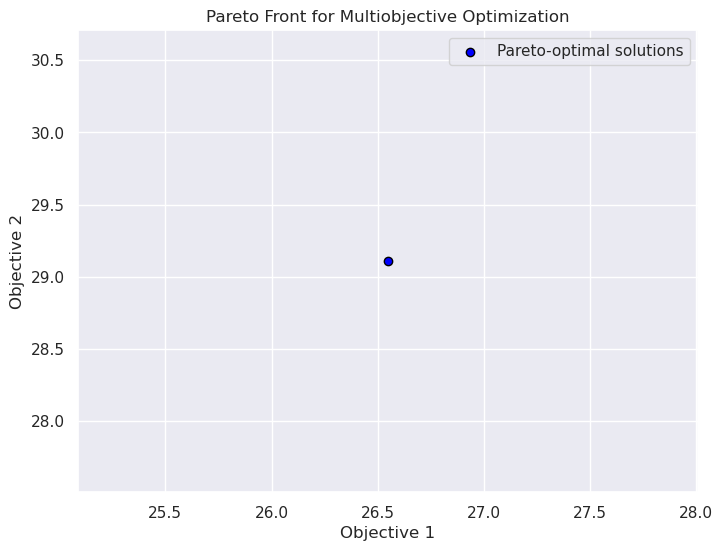

In [7]:
import random
import math
import matplotlib.pyplot as plt

# Define the objective functions for the multiobjective optimization
def objective_function1(x):
    # Example objective function (replace with your own)
    return x[0] ** 2 + x[1] ** 2

def objective_function2(x):
    # Example objective function (replace with your own)
    return (x[0] - 1) ** 2 + (x[1] - 1) ** 2

# Define a function to calculate the distance between two solutions
def calculate_distance(x1, x2, lambda_weights):
    # Weighted sum of the objective function values
    dist = sum(lambda_weights[k] * (x1[k] - x2[k]) ** 2 for k in range(len(x1)))
    return math.sqrt(dist)

# Acceptance probability function based on temperature and delta
def acceptance_probability(delta_s, T):
    if delta_s <= 0:
        return 1.0
    else:
        return math.exp(-delta_s / T)

# Function to generate a neighbor solution
def generate_neighbor(xn):
    # Example: random perturbation of a solution
    return [xn[i] + random.uniform(-0.1, 0.1) for i in range(len(xn))]

# Multiobjective Simulated Annealing Algorithm
def multiobjective_simulated_annealing(T0, alpha, Nstep, Tstop, Nstop, lambda_weights):
    # Step 1: Initialization
    x0 = [random.uniform(-10, 10) for _ in range(2)]  # Example initial solution
    PE = [x0]  # Set of potentially optimal solutions
    xn = x0
    n = 0
    T = T0

    # Evaluate initial objective functions
    z_xn = [objective_function1(xn), objective_function2(xn)]

    # Main loop
    while n < Nstop and T > Tstop:
        # Step 3: Generate a new neighbor
        x_prime = generate_neighbor(xn)
        z_x_prime = [objective_function1(x_prime), objective_function2(x_prime)]
        
        # Compute delta_s (objective function change)
        delta_s = sum(lambda_weights[k] * (z_x_prime[k] - z_xn[k]) for k in range(len(z_xn)))

        # Step 7: Calculate acceptance probability
        p = acceptance_probability(delta_s, T)

        # Step 8: Accept or reject new solution
        if delta_s <= 0 or random.random() < p:
            xn = x_prime
            z_xn = z_x_prime

            # Step 10: Update the set of potentially optimal solutions (Pareto front)
            # Remove dominated solutions from PE
            PE = [solution for solution in PE if not dominates(z_x_prime, solution)]
            if not any(dominates(solution, z_x_prime) for solution in PE):
                PE.append(x_prime)

        # Step 12: Update temperature
        if n % Nstep == 0:
            T *= alpha

        # Increment iteration
        n += 1

    return PE

# Helper function to check if one solution dominates another
def dominates(x, y):
    return all(xi <= yi for xi, yi in zip(x, y)) and any(xi < yi for xi, yi in zip(x, y))

# Parameters
T0 = 1000  # Initial temperature
alpha = 0.95  # Cooling factor
Nstep = 10  # Number of steps for temperature update
Tstop = 1e-3  # Final temperature
Nstop = 1000  # Maximum number of iterations
lambda_weights = [0.5, 0.5]  # Equal weights for the two objectives

# Run the multiobjective simulated annealing
pareto_optimal_solutions = multiobjective_simulated_annealing(T0, alpha, Nstep, Tstop, Nstop, lambda_weights)

# Extract objective values for plotting
objective1_values = [objective_function1(solution) for solution in pareto_optimal_solutions]
objective2_values = [objective_function2(solution) for solution in pareto_optimal_solutions]

# Plot the Pareto front (2D scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(objective1_values, objective2_values, c='blue', label='Pareto-optimal solutions', edgecolor='black')
plt.title('Pareto Front for Multiobjective Optimization')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.grid(True)
plt.legend()
plt.show()
